# Project Setup

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [51]:
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [52]:
df = pd.read_csv("data/train.csv").drop("Id", axis=1)
df.head(4)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  

[4 rows x 80 columns]

# Data Cleanup and EDA

Since there were too many missing values, simply using the null value print command was not enough to display all, therefore they were displayed in a bar chart. 

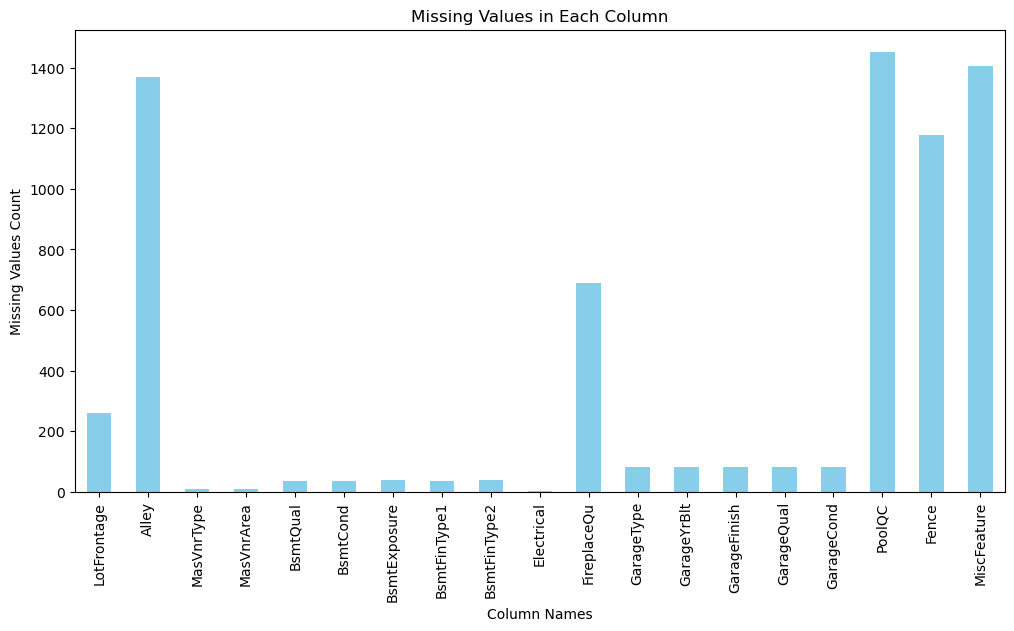

In [54]:
# Display all colomns, with this function, because there are too many for the default view
# Convert the missing values count to a DataFrame and display it and plot missing values in the bar chart

missing_values = df.isnull().sum()
missing_values[missing_values > 0].plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.xlabel("Column Names")
plt.ylabel("Missing Values Count")
plt.title("Missing Values in Each Column")
plt.show()

This will give an in depth breakdown of the missing values for the whole dataset, as a heatmap, so that we can understand not just the count but the exact places where the values were missing.

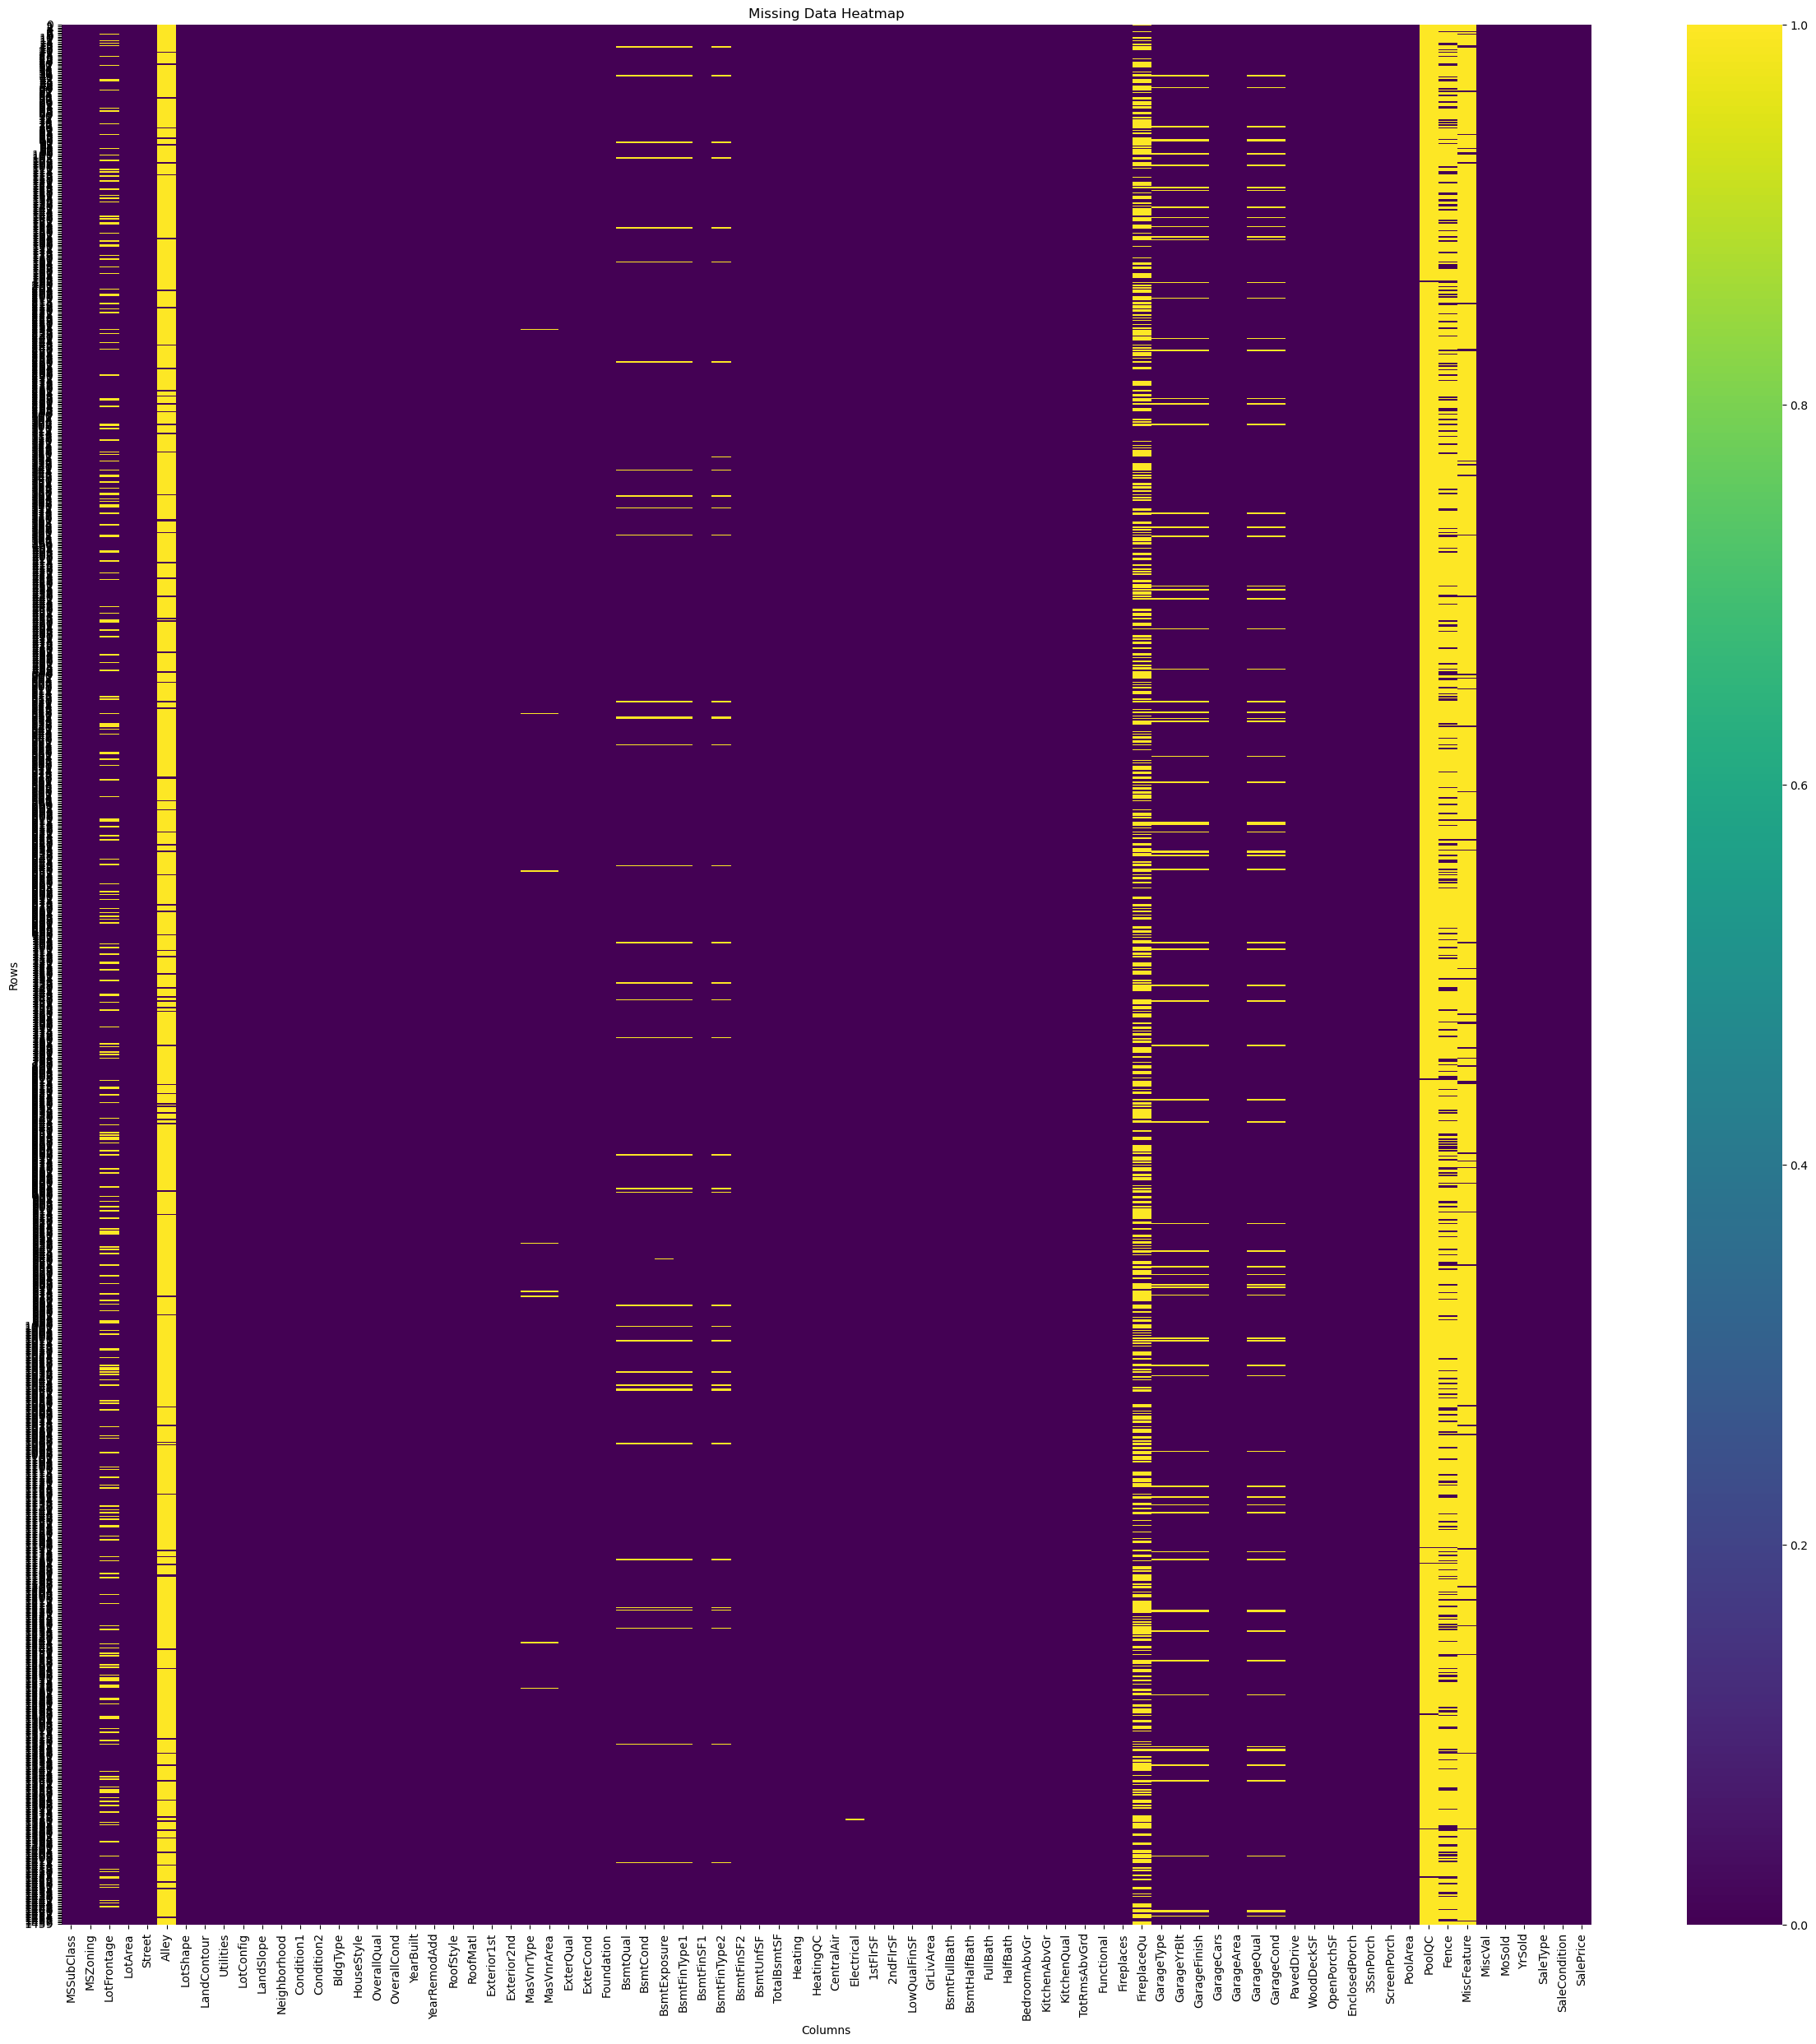

In [55]:
plt.figure(figsize=(30, 30))  # Adjust the figure size as needed
sns.heatmap(df.isnull(), yticklabels=True, xticklabels=True, cbar=True, cmap="viridis")  # Use a color map for visibility
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.title("Missing Data Heatmap")
plt.show()

In [56]:
df.shape

(1460, 80)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### As a general rule: I have replaced some values with mean data for numeric and most occuring for catagorical. Whenever I came accross data with more than 50% null values, those colomons were dropped

LotFrontage has some missing values and is a numeric type of data, therefore we will fill the mean for the same

In [58]:
## Fill Missing Values

df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

Alley has too many missing values (more than 50% and therefore is dropped)

In [59]:
df.drop(['Alley'],axis=1,inplace=True)

These 4 features are object type (catagorical) and therefore, the most occuring value (mode) has been replaced over here

In [60]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

Garrage has too many missing values (more than 50%)

In [61]:
df.drop(['GarageYrBlt'],axis=1,inplace=True)

These 3 features are object type (catagorical) and therefore, the most occuring value (mode) has been replaced over here

In [62]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

These 3 features have too many missing values (more than 50%)

In [63]:
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

These 6 features are object type (catagorical) and therefore, the most occuring value (mode) has been replaced over here

In [64]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0])

In [65]:
df.shape

(1460, 75)

In [66]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside       Gtl  ...             0         0           0   
1    AllPub       FR2       Gtl  ...             0         0           0   
2    AllPub    Inside       Gtl  ...             0         0           0   
3    AllPub    Corner       Gtl  ...           272         0           0   
4    AllPub       FR2       Gtl  ...             0         0           0   

  PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0        0       0       2    2008        WD         Normal    208500  
1        0       0       5    2007        WD         Normal    181500  
2        0       0       9    2008        WD         Normal    223500  
3        0       0       2    2006        WD        Abnorml    140000  
4        0       0      12    2008        WD         Normal    250000  

[5 rows x 75 columns]

In [67]:
missing_values = df.isnull().sum()
print(missing_values)

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64


In [68]:
df.isnull().values.any()

False

***The data is now clean with no missing values***

In [69]:
house_features = df.iloc[:,0:74] # Independent variables
house_price = df['SalePrice'] # Outcome variable
house_features.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
0    AllPub    Inside       Gtl  ...          61             0         0   
1    AllPub       FR2       Gtl  ...           0             0         0   
2    AllPub    Inside       Gtl  ...          42             0         0   
3    AllPub    Corner       Gtl  ...          35           272         0   
4    AllPub       FR2       Gtl  ...          84             0         0   

  ScreenPorch PoolArea  MiscVal  MoSold  YrSold  SaleType SaleCondition  
0           0        0        0       2    2008        WD        Normal  
1           0        0        0       5    2007        WD        Normal  
2           0        0        0       9    2008        WD        Normal  
3           0        0        0       2    2006        WD       Abnorml  
4           0        0        0      12    2008        WD        Normal  

[5 rows x 74 columns]

In [70]:
house_price.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [71]:
# Select numeric columns (int64, float64)
house_features_numericOnly = house_features.select_dtypes(include=['int64', 'float64'])

# Count the number of int and float columns
int_columns = house_features_numericOnly.select_dtypes(include='int64').shape[1]
float_columns = house_features_numericOnly.select_dtypes(include='float64').shape[1]

# Print the number of int and float features
print(f"Number of int64 features: {int_columns}")
print(f"Number of float64 features: {float_columns}")

Number of int64 features: 33
Number of float64 features: 2


In [72]:
house_features_numericOnly.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  GarageArea  \
0          2003       196.0         706           0  ...         548   
1          1976         0.0         978           0  ...         460   
2          2002       162.0         486           0  ...         608   
3          1970         0.0         216           0  ...         642   
4          2000       350.0         655           0  ...         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           61              0          0            0         0   
1         298            0              0          0            0         0   
2           0           42              0          0            0         0   
3           0           35            272          0            0         0   
4         192           84              0          0            0         0   

   MiscVal  MoSold  YrSold  
0        0       2    2008  
1        0       5    2007  
2        0       9    2008  
3        0       2    2006  
4        0      12    2008  

[5 rows x 35 columns]

In [73]:
house_features_numericOnly.shape

(1460, 35)

In [74]:
house_price.shape

(1460,)

In [75]:
# Split into train-test partition
X_train, X_test, y_train, y_test = train_test_split(house_features_numericOnly, house_price, test_size = 0.20, random_state = 23)

# Create scaling object
scaler = StandardScaler()

# Fit scaling object with training data
scaler.fit(X_train)

# Transform both train and test partitions by applying scaling
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
KNNregressor = KNeighborsRegressor(n_neighbors=5) #Vary neighbors=5..20 and check accuracy
KRegmodel = KNNregressor.fit(X_train, y_train)

In [77]:
# Predictions
y_pred = KNNregressor.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate R² score on the test set
r_sq_knn = KNNregressor.score(X_test, y_test)

print("Mean Squared Error (MSE) of KNN = {}".format(mse))
print("R-square of KNN = {}".format(r_sq_knn))

Mean Squared Error (MSE) of KNN = 886447589.2126029
R-square of KNN = 0.8241863852010607


# Feautre Reduction with EDA

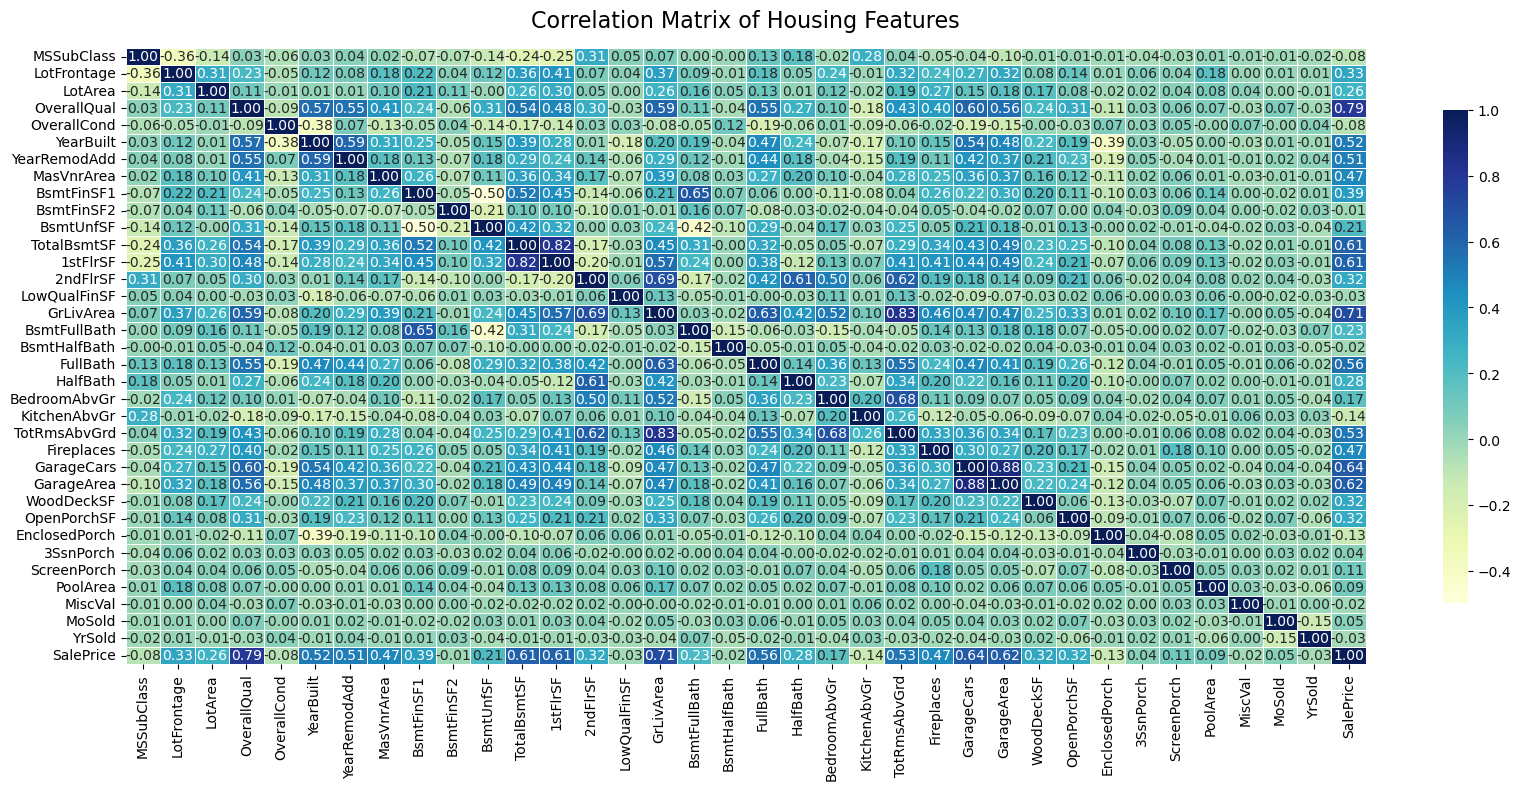

In [78]:
plt.figure(figsize=(20, 8))

sns.heatmap(df.corr(), 
            cmap="YlGnBu",                # Colormap for vibrant colors
            annot=True,                   # Annotate with correlation values
            fmt=".2f",                    # Format values to 2 decimal places
            linewidths=0.5,               # Add space between cells
            annot_kws={"size": 10},       # Set annotation font size
            cbar_kws={"shrink": 0.8})     # Shrink color bar for better fit

plt.title('Correlation Matrix of Housing Features', fontsize=16, pad=15)
plt.show()


### Checking Inter-correlation and Correlation with Target

At first I wanted to find the correlation between the final outcome variable and other variables. My goal was to remove any variable which is very less collinear with the output variable "Sales price" and highly collinear with other variables, potentially causing both over-fitting and not contributing much to the prediction of the target

Unfortunatelly, there isnt any variable with such attributes, therefore no variable was dropped during this intial stage.

In [79]:
df.drop(['BsmtFinSF2','LowQualFinSF','BsmtHalfBath', 'MiscVal', 'MoSold', 'YrSold'],axis=1,inplace=True)

In [80]:
df.drop(['GarageCars'],axis=1,inplace=True)

I dropped GarrageCars as it was highly collinear with GarrageArea. As both of them have a similar collinearence with the output variable. I chose GarageCars because I believe that GarageArea would capture more fine Details

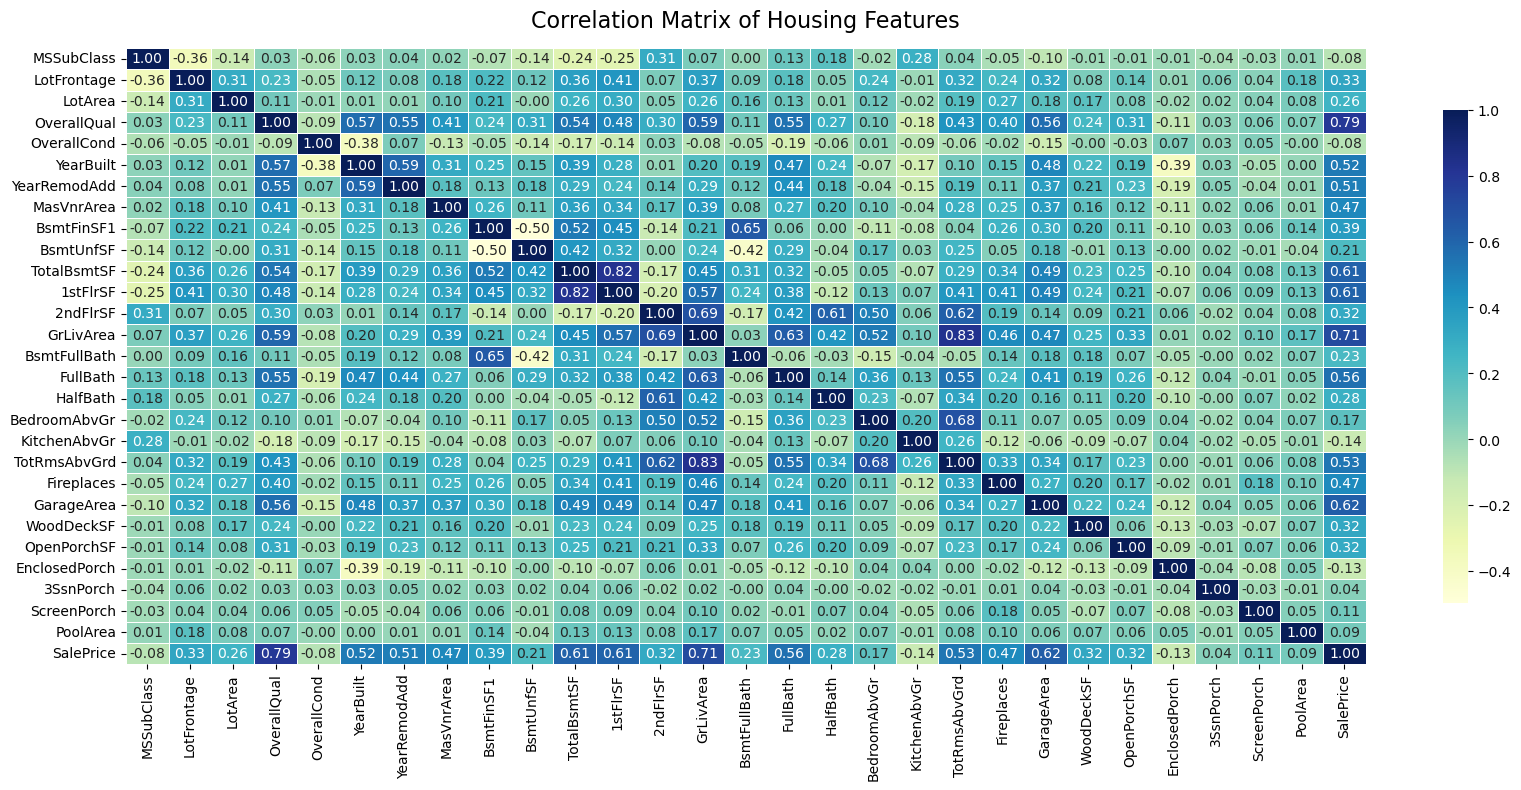

In [81]:
plt.figure(figsize=(20, 8))

sns.heatmap(df.corr(), 
            cmap="YlGnBu",                # Colormap for vibrant colors
            annot=True,                   # Annotate with correlation values
            fmt=".2f",                    # Format values to 2 decimal places
            linewidths=0.5,               # Add space between cells
            annot_kws={"size": 10},       # Set annotation font size
            cbar_kws={"shrink": 0.8})     # Shrink color bar for better fit

plt.title('Correlation Matrix of Housing Features', fontsize=16, pad=15)
plt.show()

There are still many features which are highly correlated, but unfortunatelly I do not have the domain knowledge to remove them, therefore, I will not be dropping any more colomns.

In [82]:
df.shape

(1460, 68)

In [83]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... PavedDrive WoodDeckSF OpenPorchSF  \
0    AllPub    Inside       Gtl  ...          Y          0          61   
1    AllPub       FR2       Gtl  ...          Y        298           0   
2    AllPub    Inside       Gtl  ...          Y          0          42   
3    AllPub    Corner       Gtl  ...          Y          0          35   
4    AllPub       FR2       Gtl  ...          Y        192          84   

  EnclosedPorch 3SsnPorch  ScreenPorch  PoolArea  SaleType  SaleCondition  \
0             0         0            0         0        WD         Normal   
1             0         0            0         0        WD         Normal   
2             0         0            0         0        WD         Normal   
3           272         0            0         0        WD        Abnorml   
4             0         0            0         0        WD         Normal   

  SalePrice  
0    208500  
1    181500  
2    223500  
3    140000  
4    250000  

[5 rows x 68 columns]

In [84]:
house_features = df.iloc[:,0:67] # Independent variables
house_price = df['SalePrice'] # Outcome variable
house_features.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... GarageCond PavedDrive WoodDeckSF  \
0    AllPub    Inside       Gtl  ...         TA          Y          0   
1    AllPub       FR2       Gtl  ...         TA          Y        298   
2    AllPub    Inside       Gtl  ...         TA          Y          0   
3    AllPub    Corner       Gtl  ...         TA          Y          0   
4    AllPub       FR2       Gtl  ...         TA          Y        192   

  OpenPorchSF EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  SaleType  \
0          61             0          0            0         0        WD   
1           0             0          0            0         0        WD   
2          42             0          0            0         0        WD   
3          35           272          0            0         0        WD   
4          84             0          0            0         0        WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal  

[5 rows x 67 columns]

In [85]:
house_price.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

## Perform One Hot Encoding

In [113]:
# Assuming `df` is your original DataFrame
house_features = df.iloc[:, 0:67]  # Independent variables
house_price = df['SalePrice']      # Outcome variable

# Perform one-hot encoding on house_features
house_features_encoded = pd.get_dummies(house_features, drop_first=True)

#Create Temp
house_features_num_temp = pd.get_dummies(house_features, drop_first=True)

# Display the first few rows of the encoded features
house_features_encoded.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtUnfSF  ...  SaleType_ConLI  \
0          2003       196.0         706        150  ...               0   
1          1976         0.0         978        284  ...               0   
2          2002       162.0         486        434  ...               0   
3          1970         0.0         216        540  ...               0   
4          2000       350.0         655        490  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 228 columns]

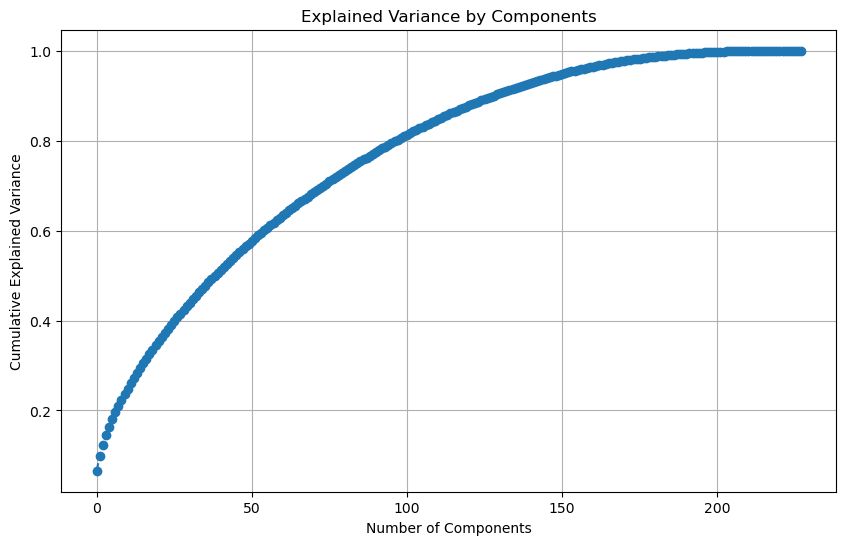

Number of components explaining 70% variance: 75
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  4.375618 -1.737649 -0.976281 -2.096685  0.159533 -1.428813  0.110026   
1 -0.108935  3.140045 -0.497432 -0.444982  1.122750 -0.701730 -0.948040   
2  5.085705 -0.816381 -0.226344 -2.447315  0.964309 -2.030944 -0.275950   
3 -2.049962 -1.508709  2.047174 -0.150530  0.369093 -0.395097 -2.057730   
4  6.501504 -0.147580  2.323169 -3.076375  0.291106 -1.303897 -0.354543   

        PC8       PC9      PC10  ...      PC66      PC67      PC68      PC69  \
0  1.061597 -1.640492  0.768444  ... -0.516818 -0.869460 -0.100706 -0.071977   
1 -0.550390  0.347953  1.129484  ... -0.995948 -1.294510 -1.216719  0.710402   
2  1.353311 -1.423022  0.508738  ...  0.125606 -0.315923  0.077283  0.842454   
3 -1.748084 -0.103053  0.191101  ... -0.931877  0.531779  0.618831  0.607714   
4  2.156136 -1.715147  1.131126  ... -0.490803  0.102626 -0.003467  0.673300   

       PC70      PC

In [87]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assume house_features_encoded is a DataFrame
# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(house_features_encoded)

# Apply PCA
pca = PCA()
pca_components = pca.fit_transform(scaled_features)

# Visualize the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(
    np.cumsum(pca.explained_variance_ratio_),
    marker='o',
    linestyle='--'
)
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Choose the number of components that explain ~95% of variance
explained_variance_threshold = 0.70
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= explained_variance_threshold) + 1

print(f"Number of components explaining {explained_variance_threshold * 100:.0f}% variance: {n_components}")

# Refit PCA with optimal number of components
pca_optimal = PCA(n_components=n_components)
house_features_pca = pca_optimal.fit_transform(scaled_features)

# Create a DataFrame with the reduced features
pca_columns = [f'PC{i+1}' for i in range(n_components)]
house_features_encoded = pd.DataFrame(house_features_pca, columns=pca_columns)

print(
    .head())

# Building Models

## Linear Regression

In [100]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(
    house_features_encoded, house_price, test_size=0.2, random_state=42
)

# Initialize Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print(f"Training MSE: {mse_train:.2f}, R-squared: {r2_train}")
print(f"Testing MSE: {mse_test:.2f}, R-squared: {r2_test}")

Training MSE: 997476269.08, R-squared: 0.8327658908774743
Testing MSE: 1174194509.17, R-squared: 0.8469172656471053


## K-Nearest Neighbour

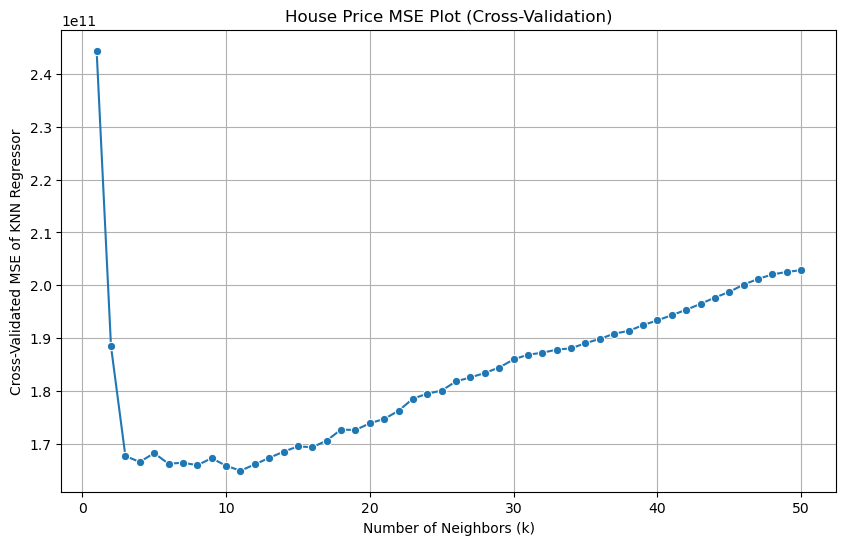

In [92]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    house_features_encoded, house_price, test_size=0.2, random_state=42
)

# Parameters for the elbow diagram
max_k = 50  # Maximum number of neighbors to test
k_arr = np.arange(1, max_k + 1, 1)
mse = np.zeros(max_k)

# Cross-validation loop for each k
for i in range(max_k):
    knum = k_arr[i]
    KNNmodel = KNeighborsRegressor(n_neighbors=knum)
    # Perform cross-validation (negative MSE is returned, so negate it)
    cv_mse = -cross_val_score(KNNmodel, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse[i] = cv_mse.mean() * 100  # Average CV MSE for this k, scaled for visualization

# Plot the elbow diagram
fig = plt.figure(figsize=(10, 6))
plt.title("House Price MSE Plot (Cross-Validation)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Cross-Validated MSE of KNN Regressor")
sns.lineplot(x=k_arr, y=mse, marker='o')
plt.grid()
plt.show()

In [123]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Optimum value of k
optimal_k = 11

# Build the KNN model
KNNmodel = KNeighborsRegressor(n_neighbors=optimal_k)

# Train the model
KNNmodel.fit(X_train, y_train)

# Predict on the test set
y_test_pred = KNNmodel.predict(X_test)

# Evaluate the model
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print(f"Optimal K: {optimal_k}")
print(f"Testing MSE: {mse_test:.2f}")
print(f"Testing R-squared: {r2_test:}")

Optimal K: 11
Testing MSE: 1974891427.93
Testing R-squared: 0.7425283652109034


## Decision Tree

In [35]:
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(house_features_encoded, house_price, test_size=0.2, random_state=42)

# Define the hyperparameter grid for tuning
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20, 30],
    'min_samples_leaf': [1, 5, 10, 15]
}

# Initialize the Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)

# Use GridSearchCV for hyperparameter tuning with 5-fold cross-validation
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 5, 10, 15],
                         'min_samples_split': [2, 10, 20, 30]},
             scoring='neg_mean_squared_error', verbose=1)

In [36]:
# Retrieve the best model from GridSearchCV
best_tree_model = grid_search.best_estimator_
print("Optimal Hyperparameters:", grid_search.best_params_)

Optimal Hyperparameters: {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 30}


In [37]:
# Perform cross-validation on the best model for more robust evaluation
cv_scores = cross_val_score(best_tree_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores  # Convert negative MSE scores back to positive

# Report cross-validated MSE scores
print("Cross-Validated MSE Scores for each fold:", cv_mse)
print("Mean Cross-Validated MSE:", np.mean(cv_mse))
print("Standard Deviation of Cross-Validated MSE:", np.std(cv_mse))

Cross-Validated MSE Scores for each fold: [1.78394705e+09 1.68907543e+09 1.91420615e+09 1.36973320e+09
 1.61982860e+09]
Mean Cross-Validated MSE: 1675358083.7599287
Standard Deviation of Cross-Validated MSE: 181944070.38288137


In [38]:
# Train on the full training set and evaluate on the test set for final performance
best_tree_model.fit(X_train, y_train)
y_pred = best_tree_model.predict(X_test)

# Calculate regression metrics on test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test Set Mean Squared Error (MSE):", mse)
print("Test Set R² Score:", r2)

Test Set Mean Squared Error (MSE): 1523576983.5162199
Test Set R² Score: 0.801367380948072


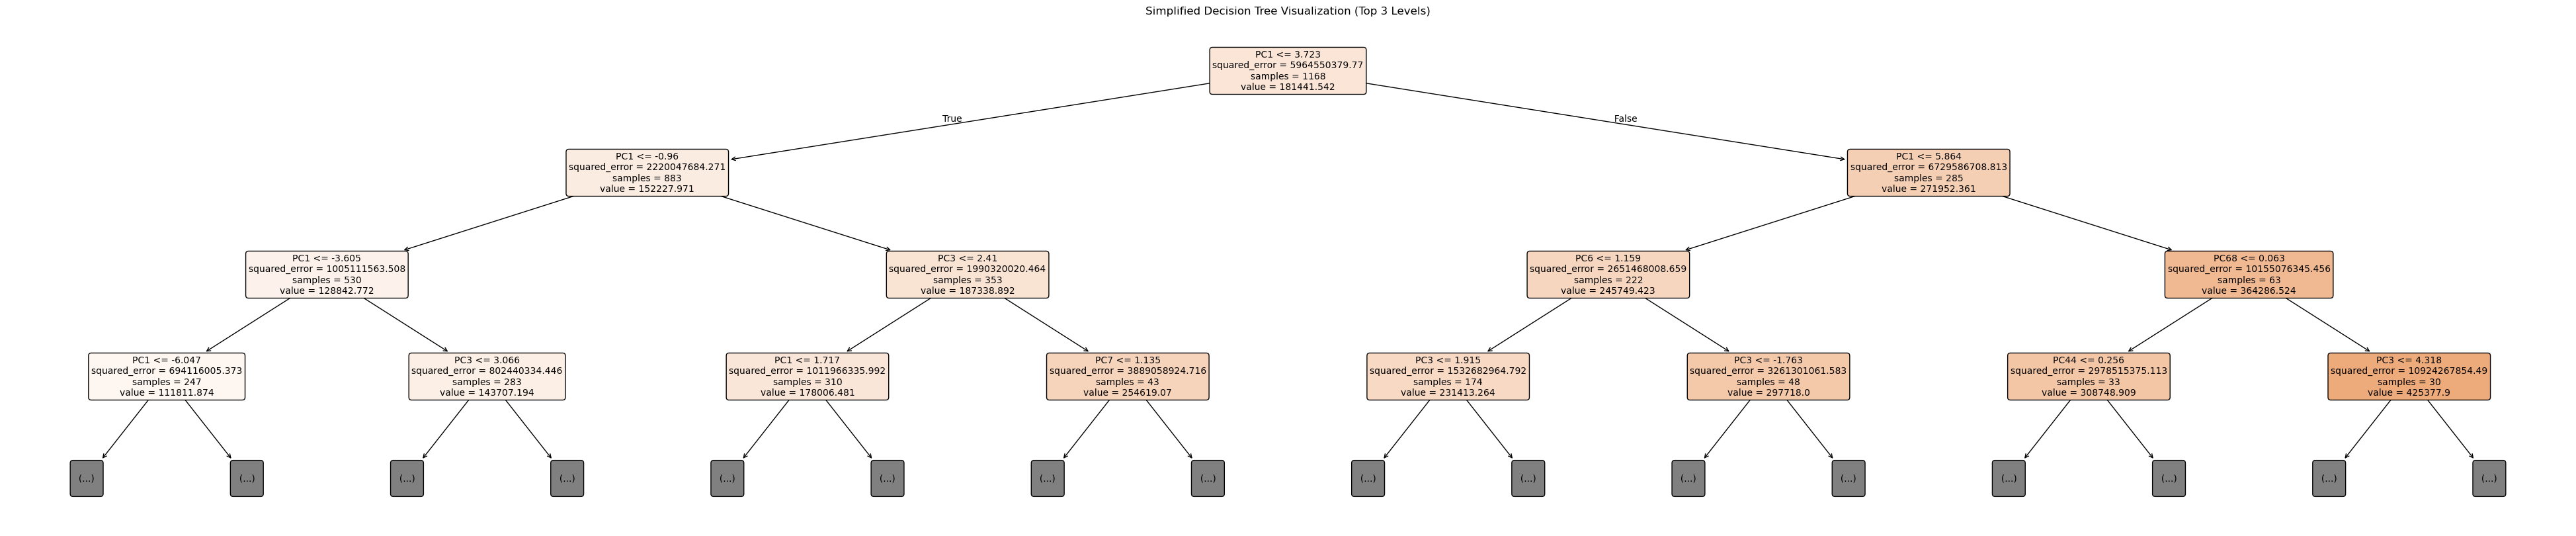

In [39]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize only the top levels of the tree to avoid overcrowding
plt.figure(figsize=(50, 10))
plot_tree(
    best_tree_model,
    feature_names=X_train.columns,  # Use column names if available
    filled=True,
    rounded=True,
    fontsize=10,
    max_depth=3  # Limit to 3 levels for easier readability
)
plt.title("Simplified Decision Tree Visualization (Top 3 Levels)")
plt.show()

## Random Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define the hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],           # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],          # Maximum depth of trees
    'min_samples_split': [2, 5, 10],          # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]             # Minimum samples required to be at a leaf node
}

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

In [45]:
# Use GridSearchCV for hyperparameter tuning with 5-fold cross-validation
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, 
                              scoring='neg_mean_squared_error', cv=5, verbose=1)
grid_search_rf.fit(X_train, y_train)

# Retrieve the best model from GridSearchCV
best_rf_model = grid_search_rf.best_estimator_
print("Optimal Hyperparameters for Random Forest:", grid_search_rf.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Optimal Hyperparameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


In [46]:
# Perform cross-validation on the best model for more robust evaluation
cv_scores_rf = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse_rf = -cv_scores_rf  # Convert negative MSE scores back to positive

# Report cross-validated MSE scores
print("Cross-Validated MSE Scores for Random Forest:", cv_mse_rf)
print("Mean Cross-Validated MSE:", np.mean(cv_mse_rf))
print("Standard Deviation of Cross-Validated MSE:", np.std(cv_mse_rf))

Cross-Validated MSE Scores for Random Forest: [1.14715700e+09 1.25365738e+09 1.62857821e+09 8.86637526e+08
 7.94482230e+08]
Mean Cross-Validated MSE: 1142102469.1146014
Standard Deviation of Cross-Validated MSE: 295035882.95166284


In [47]:
# Train on the full training set and evaluate on the test set for final performance
best_rf_model.fit(X_train, y_train)
y_pred_rf = best_rf_model.predict(X_test)

# Calculate regression metrics on test set
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Test Set Mean Squared Error (MSE):", mse_rf)
print("Random Forest Test Set R² Score:", r2_rf)

Random Forest Test Set Mean Squared Error (MSE): 1308435238.4426003
Random Forest Test Set R² Score: 0.8294159592304443


# Kmeans Clustering

In [114]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

scaler = StandardScaler()
scaled_data = scaler.fit_transform(house_features_num_temp)

wcss = []
k_values = range(1, 25)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

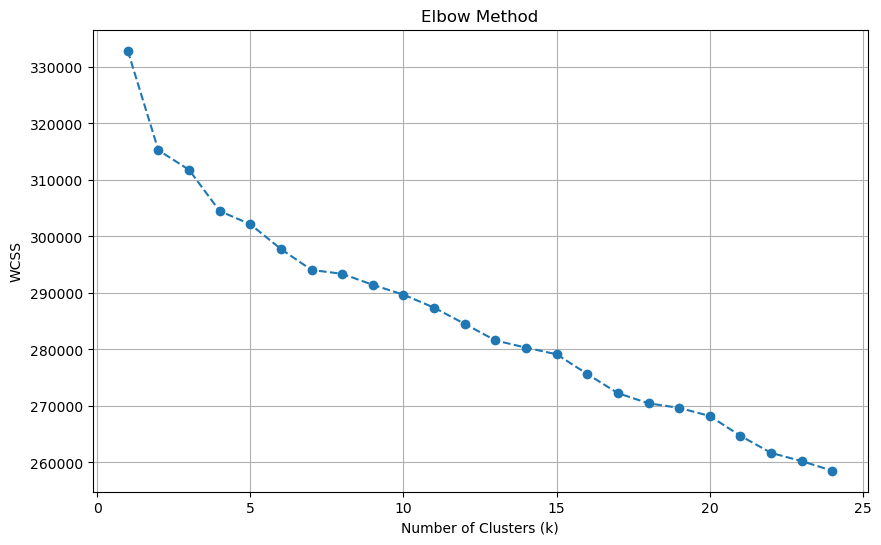

In [115]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid()
plt.show()

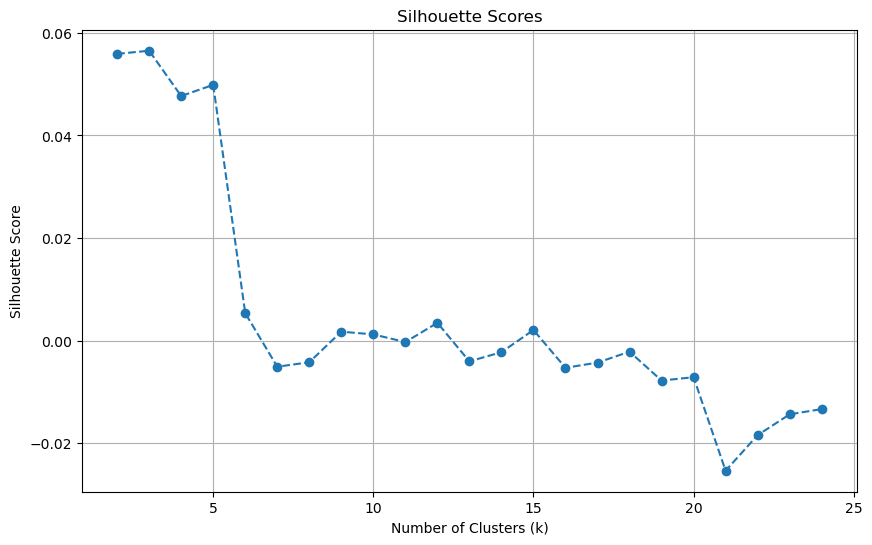

In [116]:
silhouette_scores = []
for k in k_values[1:]:  # Silhouette score is undefined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(k_values[1:], silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

In [117]:
optimal_k = 4  # Adjust this based on observed results

# Final Clustering
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans_final.fit_predict(scaled_data)
house_features_num_temp['Cluster'] = cluster_labels

In [118]:
features = house_features_num_temp.columns[:-1]

# Calculate the number of rows required
n_features = len(features)
n_cols = 3  # Number of plots per row
n_rows = (n_features + n_cols - 1) // n_cols  # Ceiling division to get rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows))
axes = axes.flatten()  # Flatten to easily iterate through axes

# Plot each feature
for idx, feature in enumerate(features):
    sns.barplot(
        data=house_features_num_temp,
        x='Cluster',
        y=feature,
        ci=None,
        estimator=np.mean,
        ax=axes[idx]
    )
    axes[idx].set_title(f'Mean {feature} by Cluster')
    axes[idx].set_ylabel(f'Average {feature}')
    axes[idx].set_xlabel('Cluster')
    axes[idx].grid()

# Hide any unused subplots
for idx in range(len(features), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

In [121]:
# Group the data by Cluster and calculate the mean for each feature
cluster_means = house_features_num_temp.groupby('Cluster').mean()

# Generate the text-based report
for cluster in cluster_means.index:
    print(f"Cluster {cluster}:")
    sorted_features = cluster_means.loc[cluster].sort_values(ascending=False)
    for feature, value in sorted_features.items():
        if value > 0.1: 
            print(f"  Feature: {feature}: {value:.2f}")
    print("-" * 40)

Cluster 0:
  Feature: LotArea: 8358.21
  Feature: YearRemodAdd: 1968.98
  Feature: YearBuilt: 1926.52
  Feature: GrLivArea: 1360.97
  Feature: 1stFlrSF: 933.39
  Feature: TotalBsmtSF: 754.23
  Feature: BsmtUnfSF: 585.58
  Feature: 2ndFlrSF: 403.93
  Feature: GarageArea: 328.86
  Feature: BsmtFinSF1: 150.64
  Feature: EnclosedPorch: 62.40
  Feature: LotFrontage: 61.48
  Feature: MSSubClass: 59.32
  Feature: WoodDeckSF: 42.88
  Feature: OpenPorchSF: 34.19
  Feature: ScreenPorch: 14.35
  Feature: MasVnrArea: 10.64
  Feature: TotRmsAbvGrd: 6.29
  Feature: OverallCond: 6.03
  Feature: OverallQual: 5.14
  Feature: BedroomAbvGr: 2.80
  Feature: FullBath: 1.27
  Feature: KitchenAbvGr: 1.11
  Feature: 3SsnPorch: 1.00
  Feature: RoofMatl_CompShg: 0.99
  Feature: Street_Pave: 0.99
  Feature: MasVnrType_None: 0.97
  Feature: Condition2_Norm: 0.96
  Feature: BsmtFinType2_Unf: 0.95
  Feature: GarageFinish_Unf: 0.94
  Feature: FireplaceQu_Gd: 0.94
  Feature: SaleType_WD: 0.93
  Feature: Functional_Ty